<a href="https://colab.research.google.com/github/angad2212/Mini_Project_3/blob/main/Diwali_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and uploading the dataset file on google colab

In [1]:
import pandas as pd #pandas library
import numpy as np #numpy library
import seaborn as sns #seaborn library (for pictures and graphs)                  
import matplotlib.pyplot as plt #matlotlib library (for pictures and graphs)

In [2]:
df = pd.read_csv("/content/EDAdata2.csv") #uploading the csv file on the jupiter notebook
df.head() #top of the file

,id,name,productID,gender,age,married,state,zone,occupation,orders,amount,status,random
0,102206025,angad,P001209,M,22,0,Punjab,north,IT Sector,6,29975.0,NaN,NaN
1,102206026,bilawal,P008765,M,21,0,Punjab,north,IT Sector,7,28754.0,NaN,NaN
2,102206027,rohan,P007283,F,34,1,Gujarat,west,Marketting,4,29864.0,NaN,NaN
3,102206028,ikraj,P006329,F,56,1,Rajhasthan,west,Lawyer,3,25686.0,NaN,NaN
4,102206029,nihaal,P007394,M,34,0,Maharashtra,west,Government,5,28865.0,NaN,NaN


In [3]:
df.tail() #bottom of the file

,id,name,productID,gender,age,married,state,zone,occupation,orders,amount,status,random
14,102206039,arnav,P009473,F,30,0,Mizoram,east,Marketting,5,NaN,NaN,NaN
15,102206040,ekam,P007382,M,19,0,Kashmir,north,Government,4,23579.0,NaN,NaN
16,102206041,maurya,P000833,M,20,0,Gujarat,west,IT Sector,6,27876.0,NaN,NaN
17,102206042,aanya,P009474,F,32,0,Mizoram,east,Banking,5,29877.0,NaN,NaN
18,102206043,sanya,P007392,F,27,1,Rajhasthan,west,Lawyer,4,20008.0,NaN,NaN


In [4]:
df.dtypes #types of data stored in the csv file

id              int64
name           object
productID      object
gender         object
age             int64
married         int64
state          object
zone           object
occupation     object
orders          int64
amount        float64
status        float64
random        float64
dtype: object

Data Cleaning

In [5]:
#now, we must drop the irrelevant data columns
df = df.drop(['status','random'], axis=1)
#axis=1 or axis='columns': If you specify axis=1 or axis='columns', 
#it means you want to drop labels from the columns of the DataFrame. 
#This operation removes the specified columns from the DataFrame, effectively reducing the number of columns.

In [7]:
df.head()

,id,name,productID,gender,age,married,state,zone,occupation,orders,amount
0,102206025,angad,P001209,M,22,0,Punjab,north,IT Sector,6,29975.0
1,102206026,bilawal,P008765,M,21,0,Punjab,north,IT Sector,7,28754.0
2,102206027,rohan,P007283,F,34,1,Gujarat,west,Marketting,4,29864.0
3,102206028,ikraj,P006329,F,56,1,Rajhasthan,west,Lawyer,3,25686.0
4,102206029,nihaal,P007394,M,34,0,Maharashtra,west,Government,5,28865.0


In [6]:
#now we must check the null values
pd.isnull(df).sum()

id            0
name          0
productID     0
gender        0
age           0
married       0
state         0
zone          0
occupation    0
orders        0
amount        3
dtype: int64

In [7]:
#as there are 3 null values in the amount column, we must drop them
df = df.dropna() #null values dropped
df.count()

id            16
name          16
productID     16
gender        16
age           16
married       16
state         16
zone          16
occupation    16
orders        16
amount        16
dtype: int64

In [8]:
#now there are no null values
pd.isnull(df).sum() 

id            0
name          0
productID     0
gender        0
age           0
married       0
state         0
zone          0
occupation    0
orders        0
amount        0
dtype: int64

<Axes: xlabel='id'>

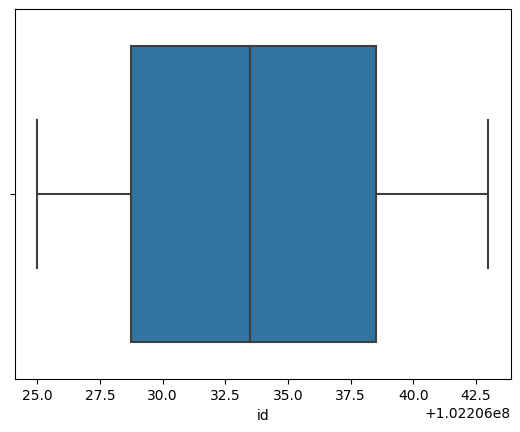

In [13]:
#now onto detecting outliers 
sns.boxplot(x=df['id'])

In [15]:
#now we sshould change the data type of amount column
df['amount'] = df['amount'].astype('int')
df.head()

,id,name,productID,gender,age,married,state,zone,occupation,orders,amount
0,102206025,angad,P001209,M,22,0,Punjab,north,IT Sector,6,29975
1,102206026,bilawal,P008765,M,21,0,Punjab,north,IT Sector,7,28754
2,102206027,rohan,P007283,F,34,1,Gujarat,west,Marketting,4,29864
3,102206028,ikraj,P006329,F,56,1,Rajhasthan,west,Lawyer,3,25686
4,102206029,nihaal,P007394,M,34,0,Maharashtra,west,Government,5,28865


In [16]:
df.describe()

,id,age,married,orders,amount
count,1.600000e+01,16.000000,16.000000,16.000000,16.000000
mean,1.022060e+08,28.750000,0.500000,5.000000,26819.062500
std,5.931554e+00,11.907981,0.516398,1.032796,3332.978317
min,1.022060e+08,19.000000,0.000000,3.000000,20008.000000
25%,1.022060e+08,20.750000,0.000000,4.000000,24831.000000
50%,1.022060e+08,22.500000,0.500000,5.000000,28277.000000
75%,1.022060e+08,34.000000,1.000000,6.000000,29114.750000
max,1.022060e+08,56.000000,1.000000,7.000000,29975.000000


***Exploratory Data Analysis :***

gender:


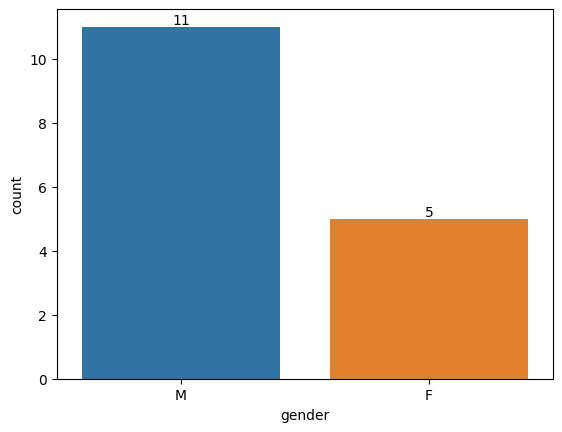

In [18]:
a = sns.countplot(x = 'gender', data = df)
#the for loop below also showcases the values on top of the bars
for bars in a.containers:
  a.bar_label(bars)

In [22]:
#the above graph depicts that males have had more orders than females
sales_generated = df.groupby(['gender'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False)
#the above code groups the dataframe by the genders
#then the [amount].sum() sums up the amount and puts it under both the genders
#then sort_values() sorts the dataframe by the 'amount' column in descending order
sales_generated

,gender,amount
1,M,303584
0,F,125521


<Axes: xlabel='gender', ylabel='amount'>

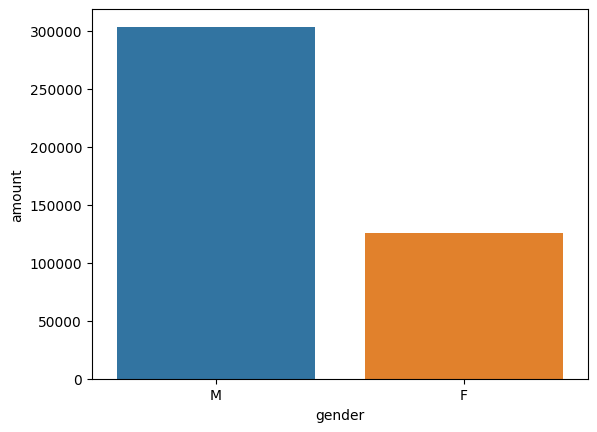

In [23]:
sns.barplot(x='gender', y='amount', data=sales_generated)

In [ ]:
#from the above graph it is clear that men have spent more than women

age:

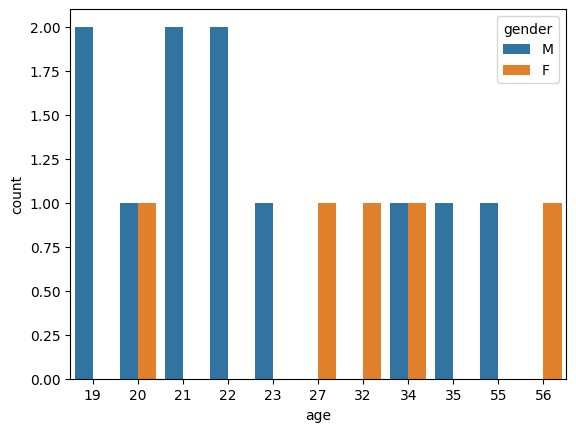

In [24]:
b = sns.countplot(data=df, x='age', hue='gender')

state:

In [28]:
#now lets see which state has had the highest number of order
sales_state = df.groupby(['state'], as_index=False)['orders'].sum().sort_values(by='orders', ascending=False)
sales_state

,state,orders
7,Punjab,18
2,Gujarat,14
6,Mizoram,10
8,Rajhasthan,7
0,Andhra Pradesh,6
9,Sikhim,6
1,Bangalore,5
4,Madhya Pradesh,5
5,Maharashtra,5
3,Kashmir,4


<Axes: xlabel='state', ylabel='orders'>

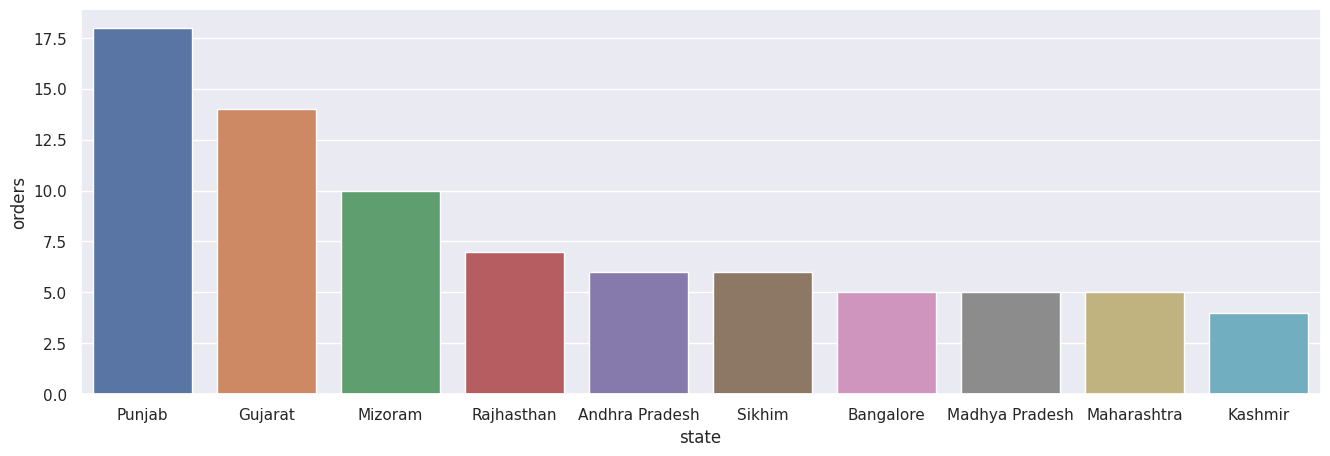

In [34]:
#now its clear that most orders have come from punjab, followed by gujurat and then mizoram
#now the graph:
plt.figure(figsize=(16,5)) #this enlarges the picture 
sns.barplot(x='state', y='orders', data=sales_state)

<Axes: xlabel='state', ylabel='amount'>

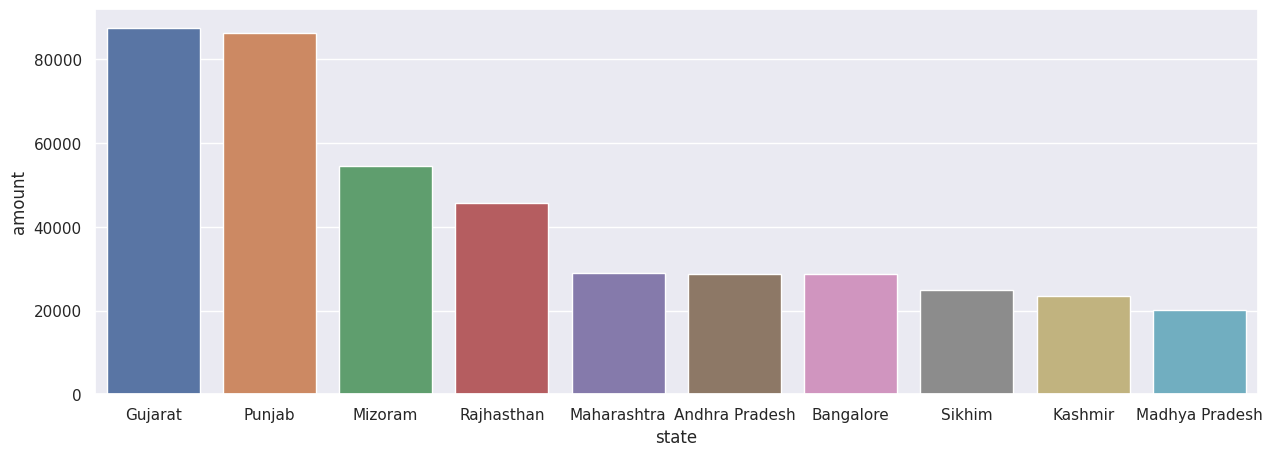

In [37]:
#now we check for amount and states:
amount_state = df.groupby(['state'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False)
sns.barplot(x='state', y='amount', data=amount_state)

<ipython-input-38-9d893dcb1388>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


<Axes: >

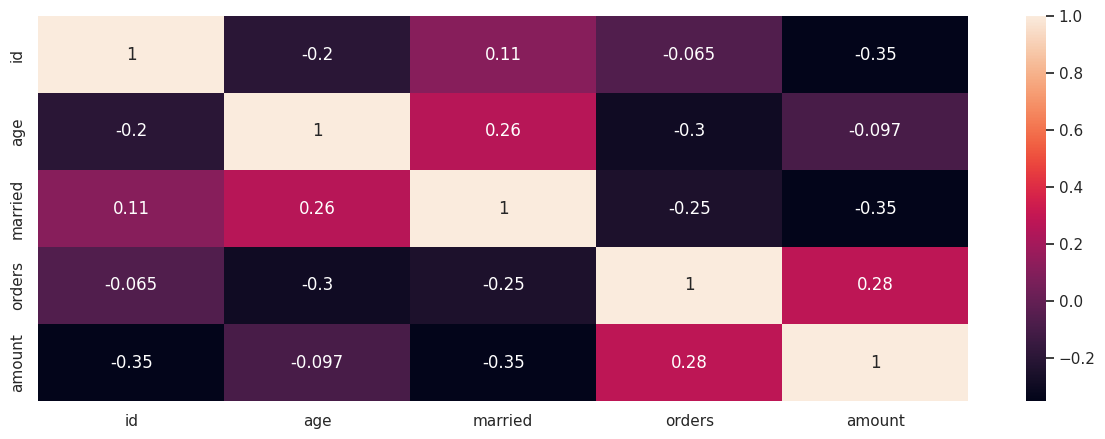

In [38]:
c= df.corr()
sns.heatmap(c,annot=True)

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The values close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

Here we can finnaly infer that maximum posotive correlation is between order and amount which is understandable. But what can also be seen is that the relation with age and orders. Since the correlation coefficient is -0.3, that means more orders are placed by younger people. Although the relation between age and amount is not that much.
